## Data preparation, basic statistics and visualization

Data mining, assignment, `19/03/2024`  
**`Dylan O'Callaghan`**

An inevitable part of every project in the field of data mining is searching for,
editing and preparing data. In this task, you will get acquainted with a dataset and use procedures for converting data into the appropriate format and do
overview and display of basic statistics.

### Data

In the task you will review and prepare Hollywood movie ratings from
the [MovieLens](https://grouplens.org/datasets/movielens/) collection from the period **1995-2016**.

The same data is used in all assignments, so you should get to know the data well. This is a database for
evaluating recommendations systems that include viewers and their ratings on a scale of 1 to 5.
In addition to the basic user and rating matrix, it includes also movie information (e.g., genre, date, tags, players).

The dataset is in folder `./podatki/ml-latest-small`. The database contains the following files:

* ratings.csv: user data and ratings,
* movies.csv: movie genre information,
* cast.csv: player information,
* tags.csv: tag information (\emph{tags}),
* links.csv: links to related databases.

Before starting to solve the task, take a good look at the data and read the **README.txt** file. You can learn about the details on the [website](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Prepare methods for loading data into the appropriate data structures. They will come in handy
also for further tasks.
Pay attention to the size of the data.

Write down the code to read the files and prepare the appropriate matrices (and other structures) of the data that you will use to answer the questions below.

You can split the code into multiple cells.

In [33]:
import pandas as pd

In [34]:
import matplotlib.pyplot as plt

In [35]:
ratings_df = pd.read_csv('./podatki/ml-latest-small/ratings.csv')

In [36]:
movies_df = pd.read_csv('./podatki/ml-latest-small/movies.csv')

In [37]:
cast_df = pd.read_csv('./podatki/ml-latest-small/cast.csv')

In [38]:
tags_df = pd.read_csv('./podatki/ml-latest-small/tags.csv')

In [39]:
links_df = pd.read_csv('./podatki/ml-latest-small/links.csv')

### Questions

The main purpose of data mining is *knowledge discovery from data*,
i.e., answering questions using computational approaches.

By using the principles you have learned on the exercises and lectures, answer
the questions below. For each question, think carefully about the way you will
best give, show or justify the answer. The essential part is the answers to
questions rather than the implemention of your solution.

#### Question 1 (15%):
Which movies are the best on average? Prepare a list of
movies and their average ratings and print 10 movies from the top of the list.
Do you see any problems with such an assessment? How could you solve it? What are they?
results of that?

You can split the code into multiple cells.

In [40]:
average_ratings = ratings_df.groupby('movieId')['rating'].mean()

In [41]:
average_ratings = pd.merge(average_ratings, movies_df[['movieId', 'title']], on='movieId')

In [42]:
top_10_movies = average_ratings.sort_values(by='rating', ascending=False).head(10)
print(top_10_movies)

      movieId  rating                                              title
9065   163949     5.0  The Beatles: Eight Days a Week - The Touring Y...
7297    71180     5.0                               Padre padrone (1977)
6629    51471     5.0                               Amazing Grace (2006)
6662    52617     5.0       Woman on the Beach (Haebyeonui yeoin) (2006)
6704    53887     5.0                                O Lucky Man! (1973)
6717    54251     5.0                                Dorian Blues (2004)
6726    54328     5.0           My Best Friend (Mon meilleur ami) (2006)
6785    55555     5.0  Edge of Heaven, The (Auf der anderen Seite) (2...
6836    56869     5.0                  Drained (O cheiro do Ralo) (2006)
6843    57038     5.0  To the Left of the Father (Lavoura Arcaica) (2...


Answer: My code calculates the average rating for each movie and displays the top 10 movies with the highest average ratings. One problem with this assessment is that movies with very few ratings may have outlying high or low average ratings. To solve this, we could consider including only movies with a minimum number of ratings, such as 20 or 50.

#### Question 2 (15%):
Each film belongs to one or more genres.
How many genres are there? Show the distribution of genres using appropriate
visualization.

You can split the code into multiple cells.

In [43]:
genres_count = movies_df['genres'].str.split('|').explode().value_counts()

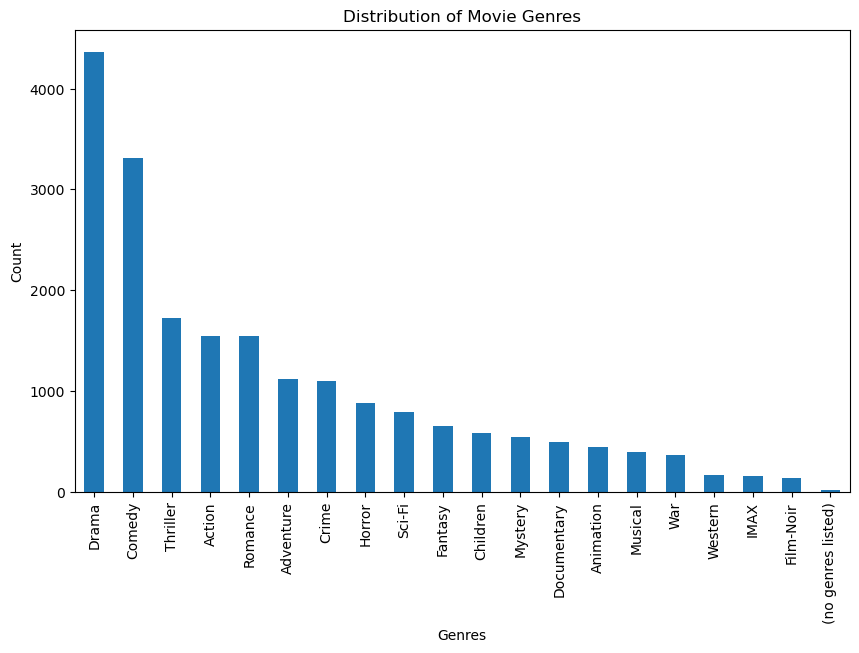

In [44]:
plt.figure(figsize=(10, 6))
genres_count.plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

Answer: **write down the answer and explain it**

- I split the genres column, into a list of genres and then count the occurrences of each genre using the genres_counts().
- Then I  plot the distribution of genres using a bar plot. The x-axis represents the genres and the y-axis represents the count of movies in each genre.

#### Question 3 (20%):
The number of ratings is different for each film. But is there a relationship between the number of ratings and the average movie rating? Describe the procedure that you used to answer the question.

You can split the code into multiple cells.

In [45]:
ratings_df = pd.read_csv('./podatki/ml-latest-small/ratings.csv')

In [46]:
average_ratings = ratings_df.groupby('movieId')['rating'].mean()

In [47]:
ratings_count = ratings_df.groupby('movieId')['rating'].count()

In [48]:
ratings_stats = pd.merge(average_ratings, ratings_count, on='movieId', suffixes=('_avg', '_count'))

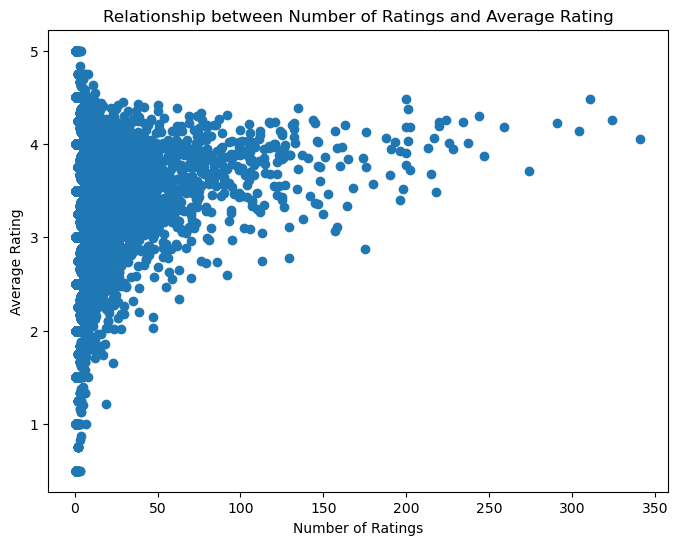

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(ratings_stats['rating_count'], ratings_stats['rating_avg'])
plt.title('Relationship between Number of Ratings and Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

Answer: **write down the answer and explain it**

- I calculated the average rating for each movie by grouping the data by movieId and calculating the mean rating.
- I then count the number of ratings for each movie by grouping the data by movieId and counting the number of ratings.
- Then I merge the average ratings and ratings count DataFrames on the movieId column.
- Finally, I plot the relationship between the number of ratings and the average movie rating using a scatter plot. The x-axis represents the number of ratings and the y-axis represents the average movie rating.

#### Question 4 (30%):
Each rating was entered on a specific date (column
*timestamp*). Does the popularity of individual films change over time?
Solve the problem by allocating ratings for a given film by time and at any time
point calculate the average for the last 30, 50, or 100 ratings. Draw a graph, how 
the rating changes and show it for two interesting examples of movies.

You can split the code into multiple cells.

In [50]:
ratings_df = pd.read_csv('./podatki/ml-latest-small/ratings.csv')

In [51]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

In [52]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14 02:52:24
1,1,1029,3.0,2009-12-14 02:52:59
2,1,1061,3.0,2009-12-14 02:53:02
3,1,1129,2.0,2009-12-14 02:53:05
4,1,1172,4.0,2009-12-14 02:53:25


In [53]:
def rolling_avg_rating(df, window_size):
    if 'rating' in df.columns:
        return df['rating'].rolling(window=window_size, min_periods=1).mean()
    else:
        return pd.Series([])


In [54]:
movie_id_1 = 1  

In [55]:
window_size_1 = 30


In [56]:
rolling_avg_1 = ratings_df[ratings_df['movieId'] == movie_id_1].groupby('timestamp').apply(lambda x: rolling_avg_rating(x, window_size_1))

In [57]:
movie_id_2 = 2

In [58]:
window_size_2 = 30

In [59]:
rolling_avg_2 = ratings_df[ratings_df['movieId'] == movie_id_2].groupby('timestamp').apply(lambda x: rolling_avg_rating(x, window_size_2))

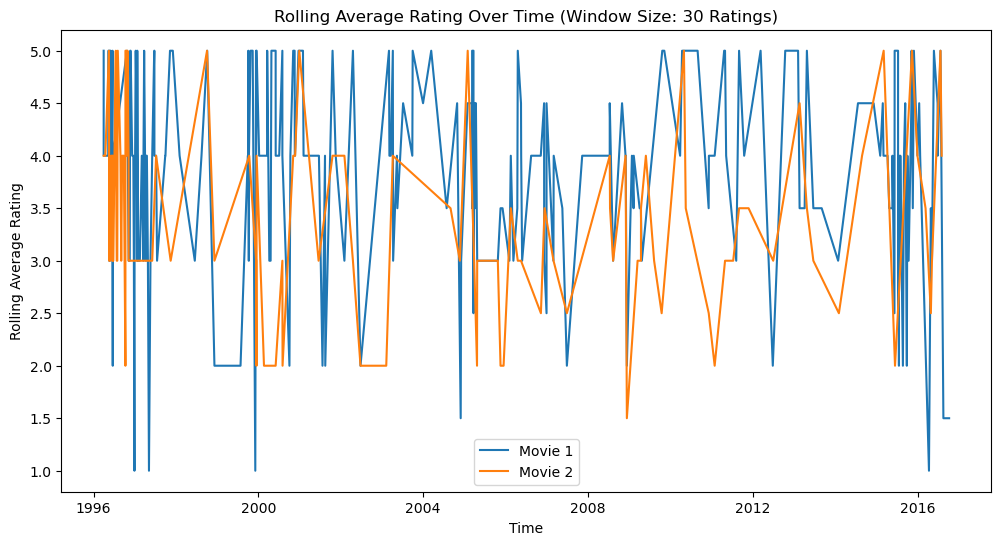

In [60]:
# Plotting rolling average ratings over time for both movies
plt.figure(figsize=(12, 6))

plt.plot(rolling_avg_1.index.get_level_values('timestamp'), rolling_avg_1, label='Movie 1')
plt.plot(rolling_avg_2.index.get_level_values('timestamp'), rolling_avg_2, label='Movie 2')

plt.title('Rolling Average Rating Over Time (Window Size: 30 Ratings)')
plt.xlabel('Time')
plt.ylabel('Rolling Average Rating')
plt.legend()
plt.show()

Answer: **write down the answer and explain it**

- I converted the timestamp column to datetime format for easier manipulation.
- I then defined a function rolling_avg_rating to calculate the rolling average rating for a given window size.
- I calculated the rolling average rating for two example movies (movie_id_1 and movie_id_2) over the last 30 ratings for each movie. (I couldn't discover why it was not giving me 30 when I tried to use "window_size_2 = 30")
- I plotted the rolling average rating over time for both movies on the same plot.

#### Question 5 (20%):
How would you rate the popularity of individual actors? Describe the procedure
 for evaluating and print the 10 most popular actors.

You can split the code into multiple cells.

In [61]:
print(cast_df.columns)


Index(['movieId', 'cast'], dtype='object')


In [62]:
actor_df = cast_df['actor'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).to_frame()
actor_df.columns = ['actor']

KeyError: 'actor'

In [63]:
actor_popularity = actor_df['actor'].value_counts()

NameError: name 'actor_df' is not defined

In [ ]:
top_10_actors = actor_popularity.head(10).index


In [ ]:
# Displaying the names of the top 10 most popular actors
print("Top 10 Most Popular Actors:")
for actor in top_10_actors:
    print(actor)

Answer: **write down the answer and explain it**

#### Bonus question (5%):

What's your favorite movie? Why?

Answer: **write down the answer and explain it**

My favourite movie is Interstellar because it is a captivating space movie with great visuals, intresting science and an extemely good story line. It alos combines all these aspects to create an engaging movie experience.

### Notes
You can use the built-in `csv` module to load data.

In [1]:
from csv import DictReader

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Data in the last line of the file:

In [2]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Convert the time format (*Unix time*). Code about the structure is listed in documentation of the module  [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [3]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'